### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import sklearn
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error   

In [2]:
df = pd.read_csv("Los_Angeles_International.csv", parse_dates = [0], index_col =0, dayfirst= True, thousands = ",")


print(df)

            Passengers
Date                  
2013-01-01     2395018
2013-02-01     2157939
2013-03-01     2653755
2013-04-01     2586235
2013-05-01     2790145
...                ...
2019-08-01     3936915
2019-09-01     3399994
2019-10-01     3497202
2019-11-01     3326902
2019-12-01     3626678

[84 rows x 1 columns]


### Splitting the data

In [3]:
train = df.iloc[:60]
test = df.iloc[49:]
for_comparing = df.iloc[60:]


for_comparing.head(10)

,Passengers
Date,
2018-01-01,3196356
2018-02-01,2950653
2018-03-01,3559029
2018-04-01,3461659
2018-05-01,3713675
2018-06-01,3983870
2018-07-01,4066465
2018-08-01,3957892
2018-09-01,3331632


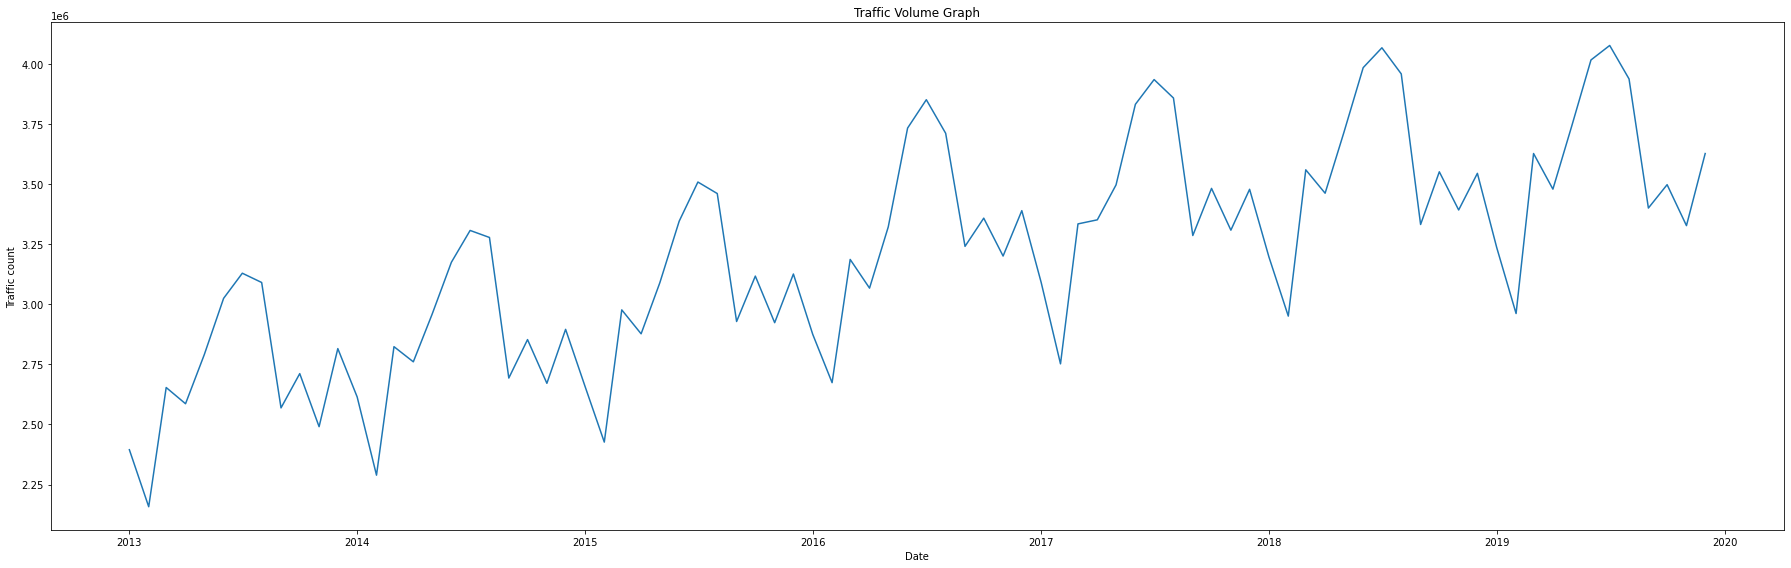

In [4]:
plt.subplots(figsize=(25, 8))
plt.title("Traffic Volume Graph")
plt.xlabel("Date")
plt.ylabel("Traffic count")
plt.tight_layout()
plt.plot(df)

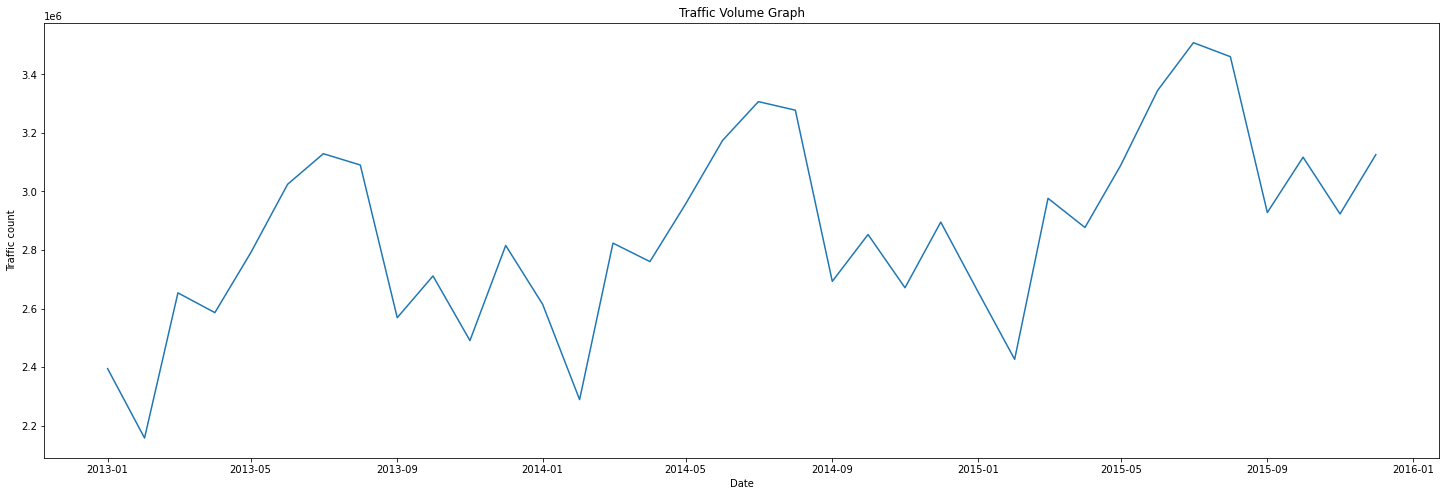

In [5]:
seasonal = df.iloc[:36]
plt.subplots(figsize=(25, 8))
plt.title("Traffic Volume Graph")
plt.xlabel("Date")
plt.ylabel("Traffic count")
plt.plot(seasonal)

### Model Fitting

In [6]:
def Holt_Winter(Data, Periods, Trend, Seasonal, Title):
    Holt_Winter = ExponentialSmoothing(Data, seasonal_periods = Periods, trend = Trend,
                                    seasonal = Seasonal).fit(use_boxcox=True)
    
    plt.subplots(figsize=(25, 8))
    plt.title(Title)
    plt.xlabel("Date")
    plt.ylabel("Passengers Count")
    
    Holt_Winter.fittedvalues.plot(color = "blue", marker = "o")
    Holt_Winter.forecast(36).plot(style = "--", marker = "o", color  = "red",
                           label = "Forecast", legend = True)

### Full Data

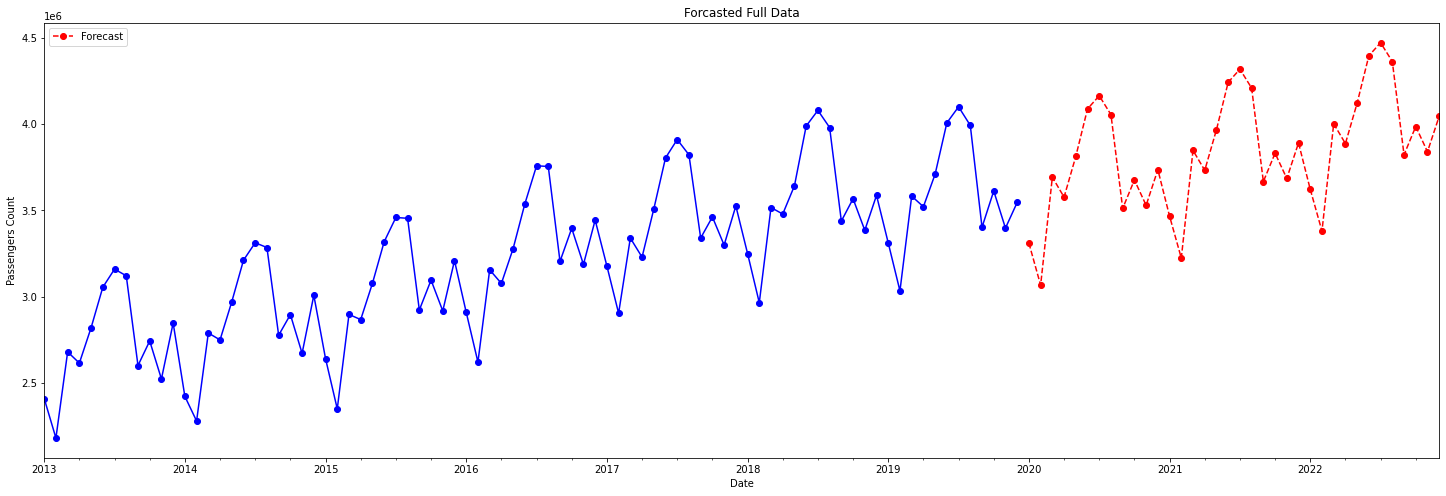

In [7]:
import warnings
warnings.filterwarnings('ignore')

Holt_Winter(df, 12, "additive", "additive",
            "Forcasted Full Data")

### Data Train

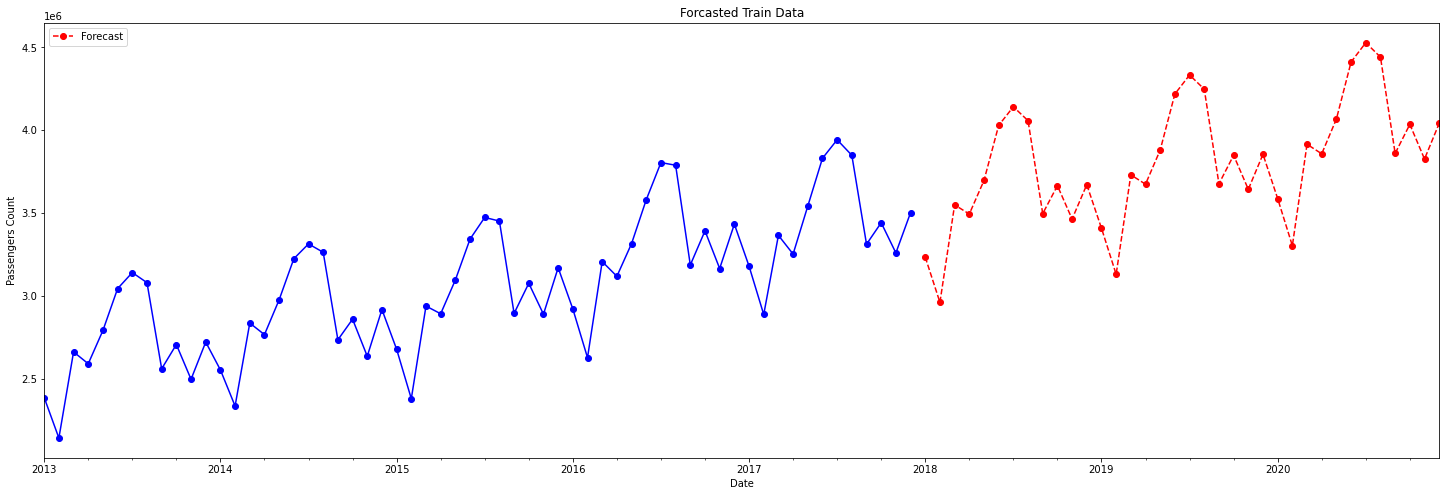

In [8]:
Holt_Winter(train, 12, "additive", "additive",
            "Forcasted Train Data")

### Data Test

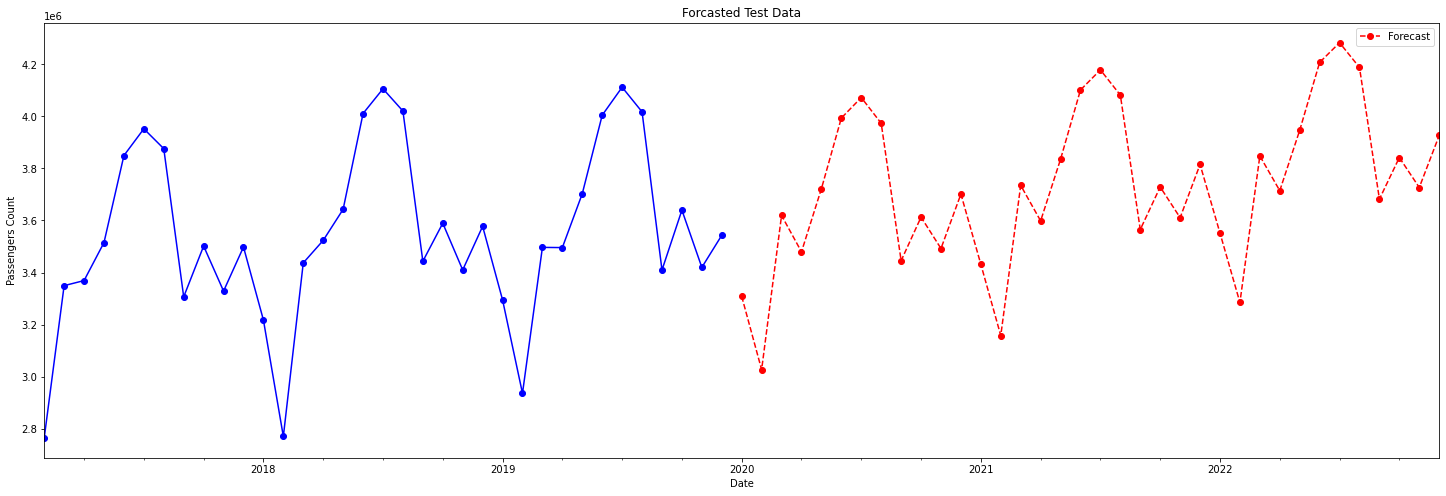

In [9]:
Holt_Winter(test, 12, "additive", "additive",
            "Forcasted Test Data")

### Comparing and Error Checking

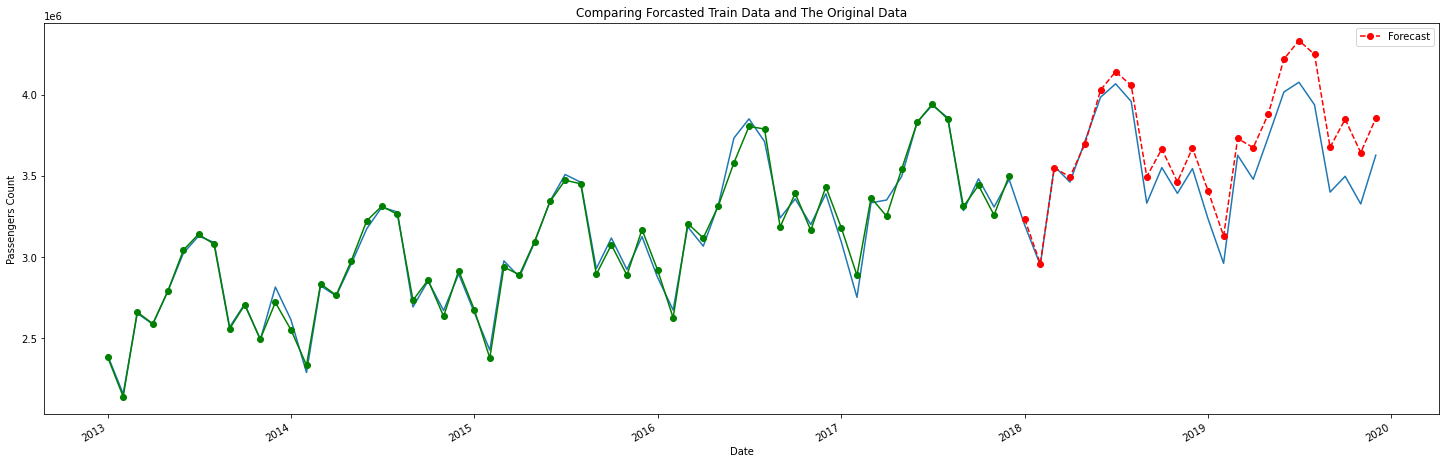

In [10]:
fit_train = ExponentialSmoothing(train, seasonal_periods = 12, trend = "additive", seasonal = "additive").fit(use_boxcox=True)

plt.subplots(figsize=(25, 8))
plt.title("Comparing Forcasted Train Data and The Original Data")
plt.xlabel("Date")
plt.ylabel("Passengers Count")
plt.plot(df)
fit_train.fittedvalues.plot(color = "green", marker = "o")
forcasting = fit_train.forecast(24)
forcasting.plot(style = "--", marker = "o", color  = "red", label = "Forecast", legend = True)

### Evaluation

In [11]:
mse = mean_squared_error(for_comparing, forcasting)
print('Mean squared error:', mse)
#Calculating MAE
mae = mean_absolute_error(for_comparing, forcasting)
print('Mean absolute error:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean squared error: 31759070074.483562
Mean absolute error: 146682.46962217792
Root Mean Squared Error: 178210.7462373792
